# Global Blood Donation Analysis: Trends, Missing Data, and Distribution

In this project, we will be analyzing global blood donation trends with a focus on blood group distribution by country. The dataset consists of three primary files:

1. **cleaned_blood_type_distribution_by_country.csv** – Contains the cleaned data of blood group distribution across various countries.
2. **countries_with_missing_blood_group_values.csv** – Includes information on countries with missing or incomplete blood group data.
3. **ref_blood_type_distribution_by_country.csv** – A reference dataset containing blood type distribution information by country for comparison.

We will explore, clean, and visualize the data to identify trends and address missing data challenges in global blood donation practices.


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
df_By_Country = pd.read_csv("blood_type_distribution_by_country.csv" ,encoding="ISO-8859-1")
df_By_Country.head()

,Country/Dependency,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania[2],"3,074,579",34.10%,31.20%,14.50%,5.20%,6.00%,5.50%,2.60%,0.90%
1,Algeria[3],"43,576,691",40.00%,30.00%,15.00%,4.25%,6.60%,2.30%,1.10%,0.75%
2,Argentina[4],"45,479,118",50.34%,31.09%,8.20%,2.16%,4.29%,2.98%,0.74%,0.20%
3,Armenia[5],"3,021,324",29.00%,46.30%,12.00%,5.60%,2.00%,3.70%,1.00%,0.40%
4,Australia[6],"25,466,459",38.00%,32.00%,12.00%,4.00%,7.00%,6.00%,2.00%,1.00%


# Data cleaning: Trasformation & Refinement

The dataset underwent a meticulous transformation process to ensure it is primed for analysis. Irrelevant footnotes and formatting inconsistencies were scrubbed from the `Country/Dependency` column, while population values were seamlessly converted into numerical formats for precise calculations. Blood type percentages were refined, with extraneous symbols discarded and values restructured into their decimal forms for analytical clarity. Any gaps in the data were swiftly addressed, ensuring a complete and robust dataset for the next phase of exploration.
The data is now pristine, ready to reveal insights with confidence.


In [19]:
df_By_Country.rename(columns={df_By_Country.columns[0]: "Country"}, inplace=True)
df_By_Country["Country"] = df_By_Country["Country"].str.strip().str.replace(r"\[.*\]", "", regex=True)

df_By_Country["Population"] = df_By_Country["Population"].str.replace(",", "", regex=True).astype(float)

percentage_columns = ["O+", "A+", "B+", "AB+", "O-", "A-", "B-", "AB-"]
for col in percentage_columns:
    df_By_Country[col] = df_By_Country[col].str.replace("%", "", regex=True)  
    df_By_Country[col] = pd.to_numeric(df_By_Country[col], errors="coerce") / 100 

df_By_Country.set_index("Country", inplace=True)

print(df_By_Country.head())


           Population      O+      A+     B+     AB+      O-      A-      B-  \
Country                                                                        
Albania     3074579.0  0.3410  0.3120  0.145  0.0520  0.0600  0.0550  0.0260   
Algeria    43576691.0  0.4000  0.3000  0.150  0.0425  0.0660  0.0230  0.0110   
Argentina  45479118.0  0.5034  0.3109  0.082  0.0216  0.0429  0.0298  0.0074   
Armenia     3021324.0  0.2900  0.4630  0.120  0.0560  0.0200  0.0370  0.0100   
Australia  25466459.0  0.3800  0.3200  0.120  0.0400  0.0700  0.0600  0.0200   

              AB-  
Country            
Albania    0.0090  
Algeria    0.0075  
Argentina  0.0020  
Armenia    0.0040  
Australia  0.0100  


# 1.What is the average distribution of blood types across all countries?


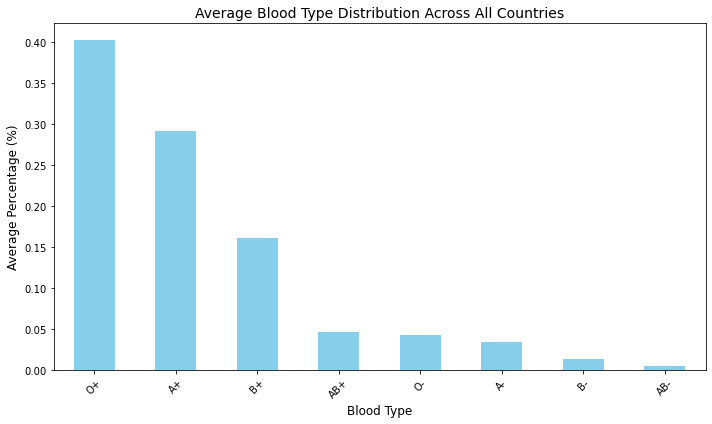

In [20]:

df_By_Country.columns = df_By_Country.columns.str.strip()

percentage_columns = ["O+", "A+", "B+", "AB+", "O-", "A-", "B-", "AB-"]

for col in percentage_columns:
    df_By_Country[col] = df_By_Country[col].astype(str).str.replace("%", "", regex=True).astype(float)

average_blood_distribution = df_By_Country[percentage_columns].mean()

plt.figure(figsize=(10, 6))
average_blood_distribution.plot(kind='bar', color='skyblue')
plt.title('Average Blood Type Distribution Across All Countries', fontsize=14)
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Average Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# 2.Which blood type has the highest average percentage across all countries in the dataset?

The blood type with the highest average percentage across all countries is O+ with an average of 0.40%.


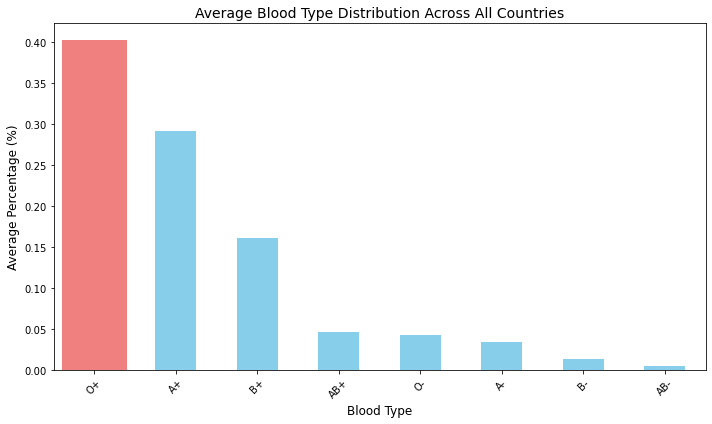

In [21]:

df_By_Country.columns = df_By_Country.columns.str.strip()

percentage_columns = ["O+", "A+", "B+", "AB+", "O-", "A-", "B-", "AB-"]

for col in percentage_columns:
    df_By_Country[col] = df_By_Country[col].astype(str).str.replace("%", "", regex=True).astype(float)

average_blood_distribution = df_By_Country[percentage_columns].mean()

max_blood_type = average_blood_distribution.idxmax()
max_percentage = average_blood_distribution.max()

print(f"The blood type with the highest average percentage across all countries is {max_blood_type} with an average of {max_percentage:.2f}%.")

plt.figure(figsize=(10, 6))
average_blood_distribution.plot(kind='bar', color='skyblue')

plt.bar(max_blood_type, max_percentage, color='lightcoral')

plt.title('Average Blood Type Distribution Across All Countries', fontsize=14)
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Average Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# 3.How does the blood type distribution vary between countries with high vs. low populations?

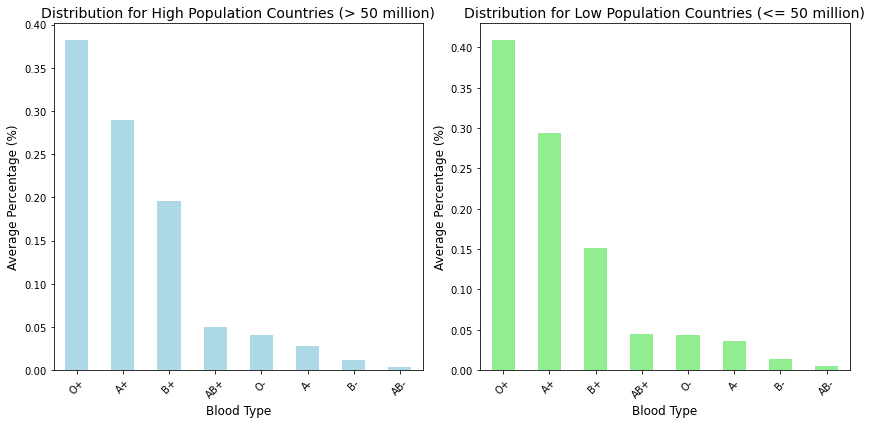

In [22]:
df_By_Country.columns = df_By_Country.columns.str.strip()

df_By_Country['Population'] = df_By_Country['Population'].apply(lambda x: int(str(x).replace(',', '').replace(' ', '').split('.')[0]))

percentage_columns = ["O+", "A+", "B+", "AB+", "O-", "A-", "B-", "AB-"]
for col in percentage_columns:
    df_By_Country[col] = df_By_Country[col].astype(str).str.replace("%", "", regex=True).astype(float)

df_high_population = df_By_Country[df_By_Country['Population'] > 50000000]
df_low_population = df_By_Country[df_By_Country['Population'] <= 50000000]

average_high_population = df_high_population[percentage_columns].mean()
average_low_population = df_low_population[percentage_columns].mean()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
average_high_population.plot(kind='bar', color='lightblue')
plt.title('Distribution for High Population Countries (> 50 million)', fontsize=14)
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Average Percentage (%)', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
average_low_population.plot(kind='bar', color='lightgreen')
plt.title('Distribution for Low Population Countries (<= 50 million)', fontsize=14)
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Average Percentage (%)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# 4.Which country has the most dominant single blood type, and what percentage of the population has that type?

The country with the most dominant single blood type is Ecuador, where O+ is present in 75.00% of the population.


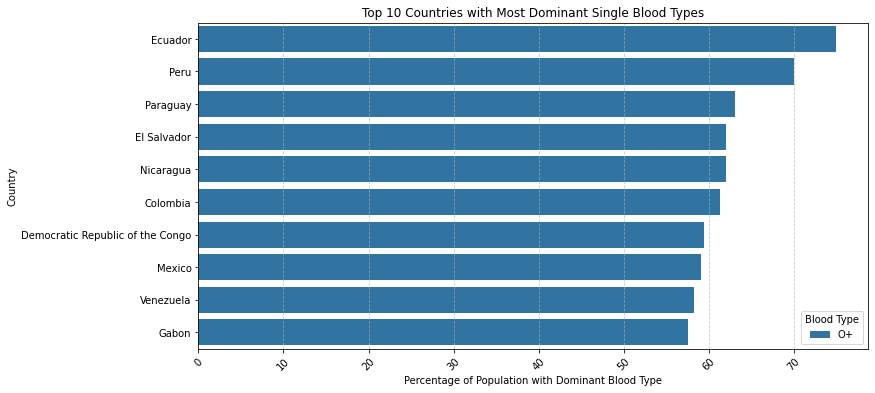

In [ ]:


df_By_Country["Dominant_Blood_Type"] = df_By_Country[percentage_columns].idxmax(axis=1)
df_By_Country["Dominant_Percentage"] = df_By_Country[percentage_columns].max(axis=1) * 100  

most_dominant_country = df_By_Country.loc[df_By_Country["Dominant_Percentage"].idxmax()]

print(f"The country with the most dominant single blood type is {most_dominant_country.name}, "
      f"where {most_dominant_country['Dominant_Blood_Type']} is present in "
      f"{most_dominant_country['Dominant_Percentage']:.2f}% of the population.")

top_10_dominant = df_By_Country.nlargest(10, "Dominant_Percentage")

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_dominant["Dominant_Percentage"],
    y=top_10_dominant.index,
    hue=top_10_dominant["Dominant_Blood_Type"],
    palette="tab10"
)
plt.xlabel("Percentage of Population with Dominant Blood Type")
plt.ylabel("Country")
plt.title("Top 10 Countries with Most Dominant Single Blood Types")
plt.legend(title="Blood Type")
plt.xticks(rotation=45)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


# 5.Which regions are at the highest risk of blood shortages based on rare blood type distributions?



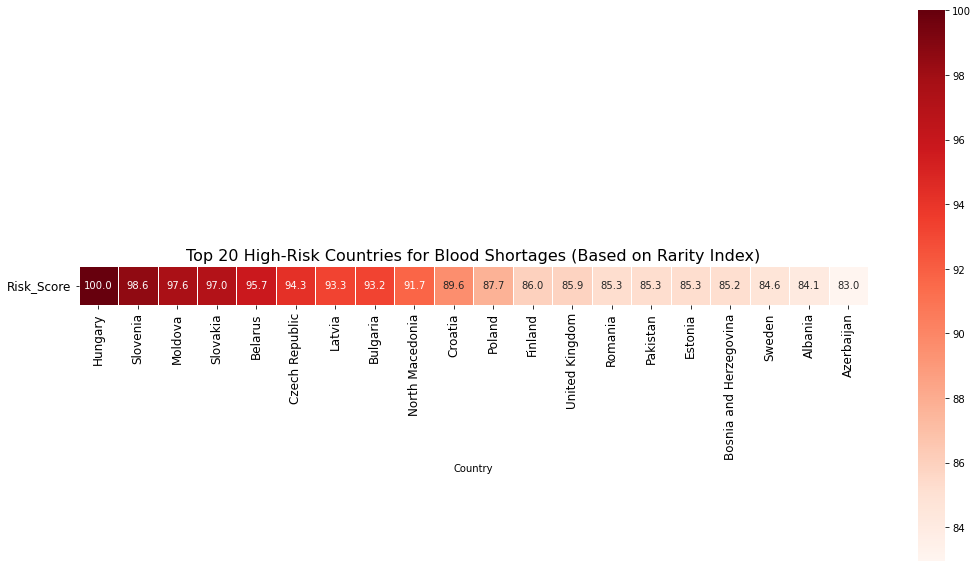

In [ ]:
global_averages = df_By_Country[percentage_columns].mean()
rarity_scores = 1 / global_averages 

df_By_Country["Rarity_Index"] = (df_By_Country[percentage_columns] * rarity_scores).sum(axis=1)

df_By_Country["Risk_Score"] = (df_By_Country["Rarity_Index"] - df_By_Country["Rarity_Index"].min()) / \
                              (df_By_Country["Rarity_Index"].max() - df_By_Country["Rarity_Index"].min()) * 100

df_sorted = df_By_Country[["Risk_Score"]].sort_values(by="Risk_Score", ascending=False).head(20)

plt.figure(figsize=(15, 8)) 
sns.heatmap(df_sorted.T, cmap="Reds", annot=True, fmt=".1f", linewidths=1, cbar=True, square=True)

plt.title("Top 20 High-Risk Countries for Blood Shortages (Based on Rarity Index)", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()  

plt.show()


# 6.